## ML Zoompcamp Linear Regression Assignment

In [208]:
# import necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [209]:
carli_housing = None
try:
    csv_url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
    carli_housing = pd.read_csv(csv_url)
    carli_housing = carli_housing
except IOError as e:
    print(e)
carli_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [210]:
carli_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [211]:
carli_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#### EDA

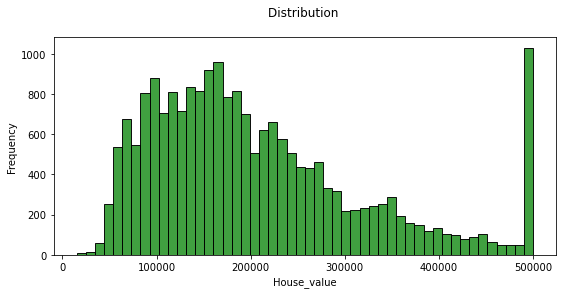

In [212]:
plt.figure(figsize=(9,4))

sns.histplot(carli_housing.median_house_value, bins=50, color='green')
plt.ylabel('Frequency')
plt.xlabel('House_value')
plt.title('Distribution \n')
plt.show()

#plot shows a long tail

##### The distribution of Prices show that the variables exhibit a long-tail distribution

### Data Preparation

In [213]:
carli_housing = carli_housing.copy()

In [214]:
carli_housing.ocean_proximity.unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [215]:
carli_housing = carli_housing.loc[(carli_housing.ocean_proximity == '<1H OCEAN') | (carli_housing.ocean_proximity == 'INLAND')]
df_carling = carli_housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]


In [216]:
carli_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [217]:
df_carling = df_carling.reset_index(drop=True)

In [218]:
df_carling

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

In [219]:
df_carling.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

##### Answer: total_bedrooms has missing values

### Question 2

In [220]:
df_carling['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

##### Answer: Median for 'population' is 1195

#### Preparing and Spitting the Dataset

In [221]:
len(df_carling)

15687

In [222]:
# Set random seed
np.random.seed(42)

#length of dataframe
n = len(df_carling)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_carling.iloc[idx]

df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
4469,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
9316,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
4983,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
13154,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
5191,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
13418,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
5390,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
860,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [223]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [224]:
# applying log transformation to 'median_house_value'
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


### Question 3

In [225]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [226]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

##### filling null values with 0


In [227]:
def prepare_X(df, val):
    df = df.fillna(val)
    X = df.values
    return X

In [228]:
X_train_zero = prepare_X(df_train, 0)
w_0, w = train_linear_regression(X_train_zero, y_train)

In [229]:
y_pred = w_0 + X_train_zero.dot(w)

In [230]:
rmse_0 = np.round(rmse(y_train, y_pred), 2)

In [231]:
# on validation set
X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)

In [232]:
rmse_mean = np.round(rmse(y_val, y_pred), 2)
print(f'RMSE with will filling missing values with mean of the variable gives: {rmse_mean}')

RMSE with will filling missing values with mean of the variable gives: 0.34


##### filling null values with mean

In [233]:
def prepare_X_mean(df):
    mean = df.mean()
    df = df.fillna(mean)
    X = df.values
    return X

In [234]:
X_train_mean = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train_mean, y_train)

In [235]:
y_pred = w_0 + X_train_mean.dot(w)

In [236]:
rmse_mean = np.round(rmse(y_train, y_pred), 2)

In [237]:
# on validation set
X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)

In [238]:
rmse_mean = np.round(rmse(y_val, y_pred), 2)
print(f'RMSE with will filling missing values with mean of the variable gives: {rmse_mean}')

RMSE with will filling missing values with mean of the variable gives: 0.34


#### Answer: Both have the same value, hence both are equally good.

### Question 4

In [239]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [240]:
# fill NAs with 0
X_train_zero = prepare_X(df_train, 0)
X_val_zero = prepare_X(df_val, 0)

In [241]:
# traininig regularized linear regression
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w_0 + X_train_zero.dot(w)
    rounded_values = np.round(rmse(y_train, y_pred), 2)
    print(f'RMSE value with {r} gives: {rounded_values}')

RMSE value with 0 gives: 0.34
RMSE value with 1e-06 gives: 0.34
RMSE value with 0.0001 gives: 0.34
RMSE value with 0.001 gives: 0.34
RMSE value with 0.01 gives: 0.34
RMSE value with 0.1 gives: 0.34
RMSE value with 1 gives: 0.34
RMSE value with 5 gives: 0.35
RMSE value with 10 gives: 0.35


#### Answer: 0 should have the smallest R

### Question 5

In [242]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for val in seed_values:
    # Set random seed
    np.random.seed(val)
    
    #length of dataframe
    n = len(df_carling)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_carling.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # applying log transformation to 'median_house_value'
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # train model
    X_train_zero = prepare_X(df_train, 0)
    w_0, w = train_linear_regression(X_train_zero, y_train)

    # on validation set
    X_val = prepare_X(df_val, 0)
    y_pred = w_0 + X_val.dot(w)

    rmse_mean = np.round(rmse(y_val, y_pred), 2)
    rmse_scores.append(rmse_mean)

print(rmse_scores)





[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]


In [243]:
np_array_rmse = np.array(rmse_scores)

std_rmse_results = round(np.std(np_array_rmse), 3)

std_rmse_results

0.006

#### Answer: Following shuffling with seed values: Stanadard Deviation is 0.006. 
0.005 selected

### Question 6

In [244]:
np.random.seed(9)

#length of dataframe
n = len(df_carling)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_carling.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# applying log transformation to 'median_house_value'
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# combine training and validation datasets
df_total_training = pd.concat([df_train, df_val])
df_total_training = df_total_training.reset_index(drop=True)

# combine target values
y_total_training = np.concatenate([y_train, y_val])


# replace missing values with 0
X_train_zero = prepare_X(df_training, 0)

# regularization r=0.001
w_0, w = train_linear_regression_reg(X_train_zero, y_total_training, 0.001)

# on validation set
X_test = prepare_X(df_test, 0)
y_pred = w_0 + X_test.dot(w)

rmse_mean = np.round(rmse(y_test, y_pred), 2)
rmse_mean

0.33

#### Answer: RMSE score on the test data is 0.33